In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_features_modified.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_labels.csv')

In [3]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

In [4]:
from sklearn.preprocessing import StandardScaler
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

In [5]:
from sklearn.model_selection import train_test_split

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

scaler_samples(X_train,X_test)

(array([[ 1.54655944,  1.54655944,  1.49737333, ..., -0.04306437,
          0.01630803, -0.23287589],
        [-0.54887097, -0.54887097, -0.54302478, ..., -0.66529532,
         -0.55928676, -0.65107686],
        [-0.95731246, -0.95731246, -0.94848851, ...,  0.08843318,
         -0.6590313 ,  0.07945142],
        ...,
        [-1.23957363, -1.23957363, -1.22124342, ..., -1.11525762,
         -0.81690924, -1.01104732],
        [-0.89571733, -0.89571733, -0.90637898, ..., -0.15033548,
         -0.4520053 , -0.03700961],
        [-0.96807665, -0.96807665, -0.95837787, ..., -0.30498029,
         -0.52336267, -0.20464292]]),
 array([[ 1.51665889,  1.51665889,  1.51140984, ..., -0.24989253,
         -0.2163448 , -0.40403831],
        [ 1.25413208,  1.25413208,  0.99843921, ..., -0.18622575,
          0.39714497, -0.32639763],
        [ 0.19595168,  0.19595168, -0.13628501, ...,  0.48613643,
          0.46582485,  0.24884928],
        ...,
        [-0.52764158, -0.52764158, -0.50857153, ...,  

In [6]:
# Data Normalization 데이터 정규화
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = scaler_samples(X_train, X_test)

### Building SVM model

In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', decision_function_shape='ovo')
svm_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(decision_function_shape='ovo')

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = svm_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.44396551724137934
Confusion Matrix:
[[1891    0    0 ...    0    0    0]
 [  34    4    0 ...    0    0    0]
 [  44    0    0 ...    0    0    0]
 ...
 [  40    0    0 ...    0    0    0]
 [  28    0    0 ...    0   11    0]
 [  36    0    0 ...    0    0    0]]


### Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 그리드 서치 설정
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1.0],
    'kernel': ['rbf']
}

In [ ]:
# GridSearchCV 설정
grid_search = GridSearchCV(SVC(decision_function_shape='ovo'), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  52.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  47.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  48.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  46.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  46.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  46.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........................C=1, gamma=1.0, kernel=rbf; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  46.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  46.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  45.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  45.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  42.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time= 2.5min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  47.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  46.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  46.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  42.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  42.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=1.0, kernel=rbf; total time= 2.5min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=1.0, kernel=rbf; total time= 2.5min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=1.0, kernel=rbf; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.0],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Predicting with the best model on test data
y_pred = best_svm_model.predict(X_test_scaled)

In [ ]:
# Evaluation with the best parameters
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with best parameters\n {conf_matrix}")

Accuracy with best parameters: 0.6994827586206896
Confusion Matrix with best parameters
 [[1624    2    5 ...    4    1    3]
 [  13   17    0 ...    0    0    0]
 [  12    0   18 ...    0    0    0]
 ...
 [  20    0    0 ...    9    0    0]
 [   2    0    0 ...    0   37    0]
 [   9    0    0 ...    0    0   23]]


In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 그리드 서치 설정, 2차 시도
param_grid = {
    'C': [100, 200, 300],
    'gamma': [0.1],
    'kernel': ['rbf']
}

In [10]:
# GridSearchCV 설정
grid_search = GridSearchCV(SVC(decision_function_shape='ovo'), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  53.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  40.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=200, gamma=0.1, kernel=rbf; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=200, gamma=0.1, kernel=rbf; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=200, gamma=0.1, kernel=rbf; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  40.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [100, 200, 300], 'gamma': [0.1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [11]:
print(f"Best parameters: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_

Best parameters: {'C': 300, 'gamma': 0.1, 'kernel': 'rbf'}


In [12]:
# Predicting with the best model on test data
y_pred = best_svm_model.predict(X_test_scaled)

In [13]:
# Evaluation with the best parameters
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with best parameters\n {conf_matrix}")

Accuracy with best parameters: 0.7039655172413793
Confusion Matrix with best parameters
 [[1596    2    5 ...    7    2    3]
 [  13   16    0 ...    0    0    0]
 [  13    0   16 ...    0    0    0]
 ...
 [  18    0    0 ...   13    0    1]
 [   3    0    0 ...    0   37    0]
 [  10    1    0 ...    0    0   23]]


In [16]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 그리드 서치 설정, 3차 시도
param_grid = {
    'C': [300,500,1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

In [17]:
# GridSearchCV 설정
grid_search = GridSearchCV(SVC(decision_function_shape='ovo'), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  40.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=500, gamma=0.1, kernel=rbf; total time=  40.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=500, gamma=0.1, kernel=rbf; total time=  42.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=500, gamma=0.1, kernel=rbf; total time=  40.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=  40.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=  41.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [300, 500, 1000], 'gamma': [0.1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [18]:
print(f"Best parameters: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_

Best parameters: {'C': 300, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
# Predicting with the best model on test data
y_pred = best_svm_model.predict(X_test_scaled)

In [20]:
# Evaluation with the best parameters
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix with best parameters\n {conf_matrix}")

Accuracy with best parameters: 0.7039655172413793
Confusion Matrix with best parameters
 [[1596    2    5 ...    7    2    3]
 [  13   16    0 ...    0    0    0]
 [  13    0   16 ...    0    0    0]
 ...
 [  18    0    0 ...   13    0    1]
 [   3    0    0 ...    0   37    0]
 [  10    1    0 ...    0    0   23]]


### Evaluation Metrics

In [21]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [22]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [23]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.7052511021868546
Recall: 0.7039655172413793


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.83      0.75      1932
           0       0.50      0.36      0.42        44
           1       0.76      0.36      0.48        45
           2       0.73      0.63      0.68        43
           3       0.71      0.69      0.70        36
           4       0.67      0.60      0.63        50
           5       0.65      0.79      0.71        38
           6       0.71      0.77      0.74        52
           7       0.67      0.76      0.71        41
           8       0.68      0.61      0.64        41
           9       0.82      0.66      0.73        50
          10       0.76      0.61      0.68        41
          11       0.59      0.63      0.61        35
          12       0.75      0.89      0.82        47
          13       0.60      0.33      0.43        36
          14       0.51      0.40      0.45        47
          15       0.55      0.41      0.47        44
   

Text(0, 0.5, 'Precision')

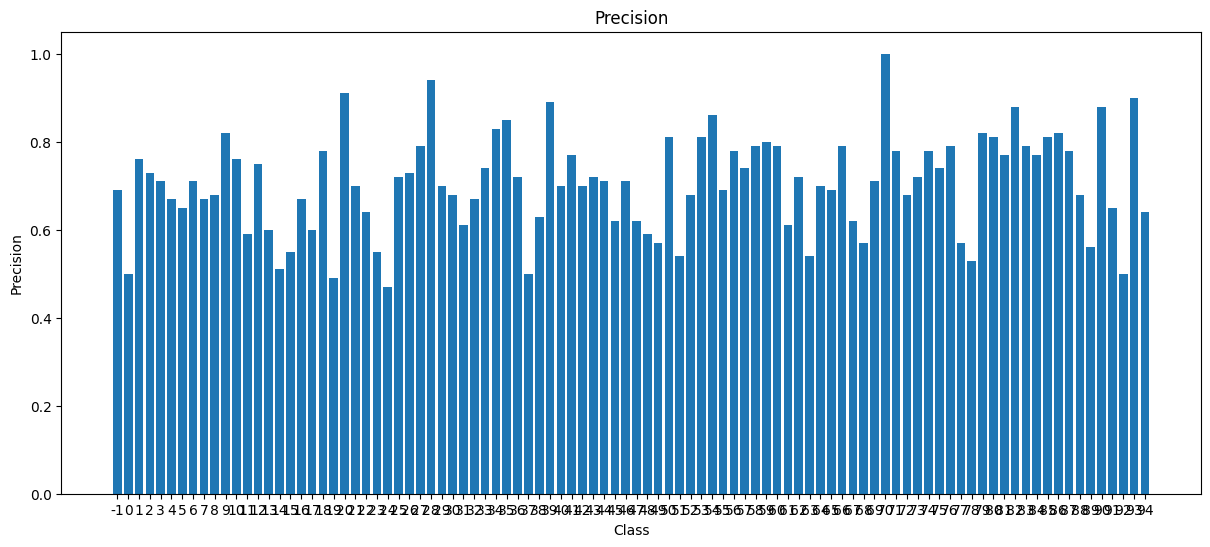

In [25]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

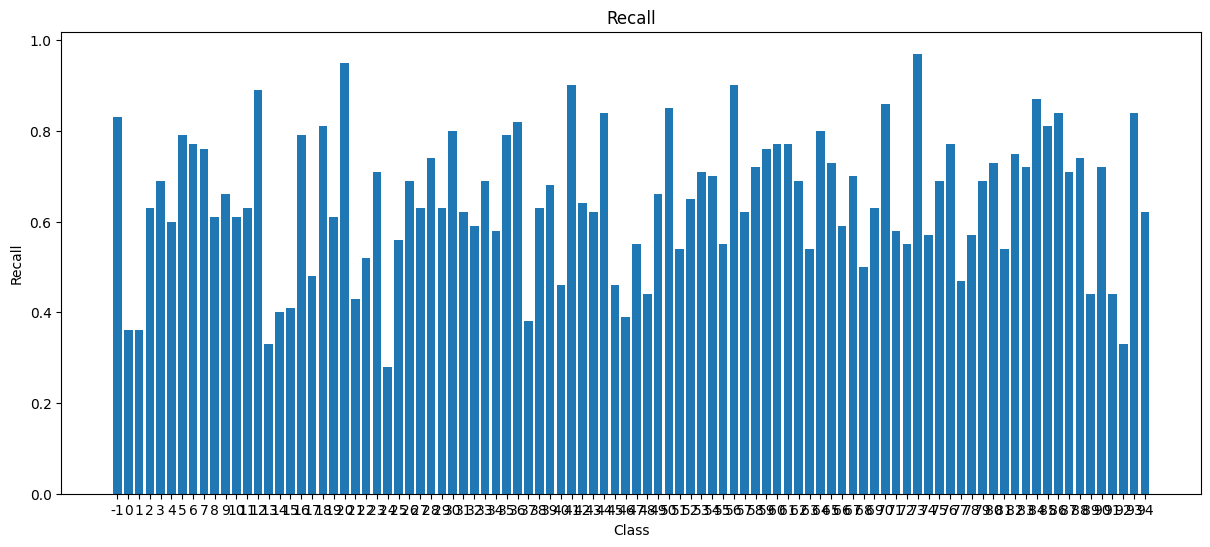

In [26]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

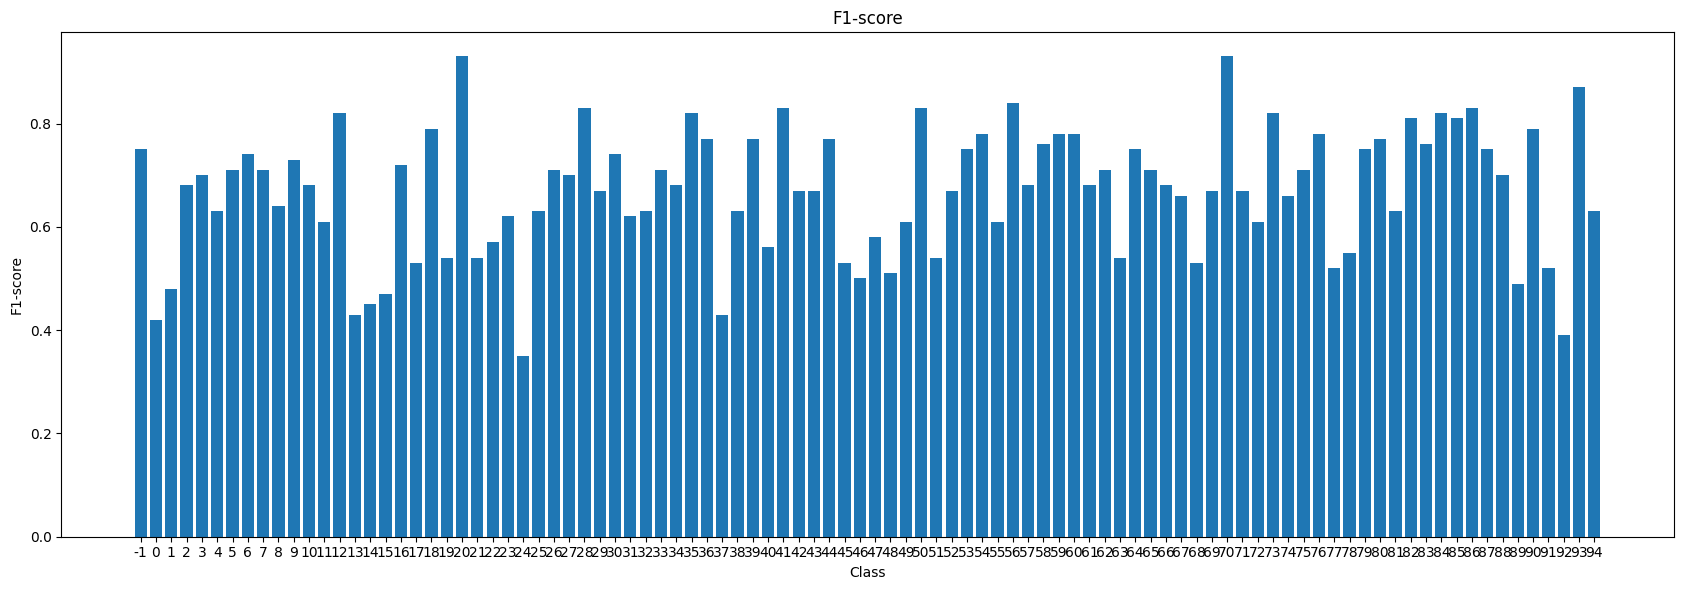

In [27]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()